In [ ]:
!pushd $TMPDIR \
&& wget https://surfer.nmr.mgh.harvard.edu/pub/data/voxelmorph/tutorial_data.tar.gz -O data.tar.gz \
&& tar -xzvf data.tar.gz \
&& popd

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from cornucopia import ContrastMixtureTransform
import os

In [ ]:
fname = os.path.join(os.environ['TMPDIR'], 'tutorial_data.npz')
dat = np.load(fname)['train'][0]
dat = torch.as_tensor(dat)

plt.imshow(dat, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()

Let us instantiate a contrast augmentation layer and apply it to the MRI.
We use fewer classes (6) than the default (12), because we're dealing
with skull-stripped 2D images, that have much fewer intensity modes than
an intact 3D volume.

In [ ]:
trf = ContrastMixtureTransform(nk=6)
aug = trf(dat[None])[0]

plt.imshow(aug, cmap='gray', interpolation='nearest')
plt.axis('off')
plt.title('MRI')
plt.show()

Now, let's synthesize a bunch of them

In [ ]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(dat[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()

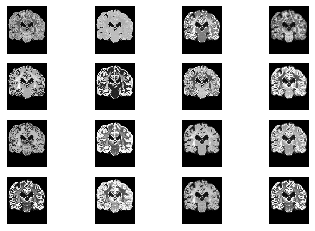

In [5]:
shape = [4, 4]

for i in range(shape[0] * shape[1]):
    plt.subplot(*shape, i+1)
    plt.imshow(trf(dat[None])[0], cmap='gray', interpolation='nearest')
    plt.axis('off')
plt.show()